# **ENGG680 - Introduction to Digital Engineering**


# Term Project: Time-Scheduled Auto Lock System for Convenience Store Security & Employee Attendance Enhancement

# GROUP 6


# Preliminary: Certificate of Work

## *We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*



|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Amanda  | Choy | Amanda Choy, 03/12/2024 | 8 | 12.5% |
| Member 2: | David | Ebede | David Ebede, 03/12/2024 | 8| 12.5% |
| Member 3: | Di | Su | Di Su, 03/12/2024 | 8 | 12.5% |
| Member 4: | Htike | Htoo | Htike Htoo, 03/12/2024 | 8 | 12.5% |
| Member 5: | Jeelkumar | Patel | Jeelkumar Patel, 03/12/2024 | 8 | 12.5%  |
| Member 6: | May | Khine | May Khine, 03/12/2024 | 8 | 12.5%  |
| Member 7: | Nathaniel | Lamptey | Nathaniel Lamptey, 03/12/2024 | 8 | 12.5%  |
| Member 8: | Sun | Mun Thet | Su Mun Thet, 03/12/2024 | 8 | 12.5%  |


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/Engg680_2024_Term_Project/Project Test/CLOCK IN-OUT DATA.xlsx'

df_clockdata = pd.read_excel(file_path)
arr_data = df_data.to_numpy()

print(df_clockdata)

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Engg680_2024_Term_Project/Project Test/CLOCK IN-OUT DATA.xlsx'

In [ ]:

file_path_2 = '/content/drive/MyDrive/Engg680_2024_Term_Project/Project Test/shift.xlsx'
df_shift = pd.read_excel(file_path_2)
arr_shift = df_data.to_numpy()

print(df_shift)

    Employee_Name  Employee_ID            Designation Shift_Day Shift_Start  \
0           Alice            1                Cleaner    Monday    18:30:00   
1            John            9                Cashier    Monday    09:30:00   
2        Bradley            13                Manager    Monday    17:30:00   
3          Celine           26            Store Clerk    Monday         NaN   
4            Mike           94  Stocker/Sales/Cashier    Monday    12:00:00   
..            ...          ...                    ...       ...         ...   
135        Rachel            7  Stocker/Sales/Cashier    Sunday         NaN   
136          Judy           41  Stocker/Sales/Cashier    Sunday    16:00:00   
137         Clara           22                Manager    Sunday    15:30:00   
138          Sera            3  Stocker/Sales/Cashier    Sunday    16:00:00   
139           Sam           12            Store Clerk    Sunday    14:00:00   

    Shift_End  
0    22:00:00  
1    13:30:00  
2  

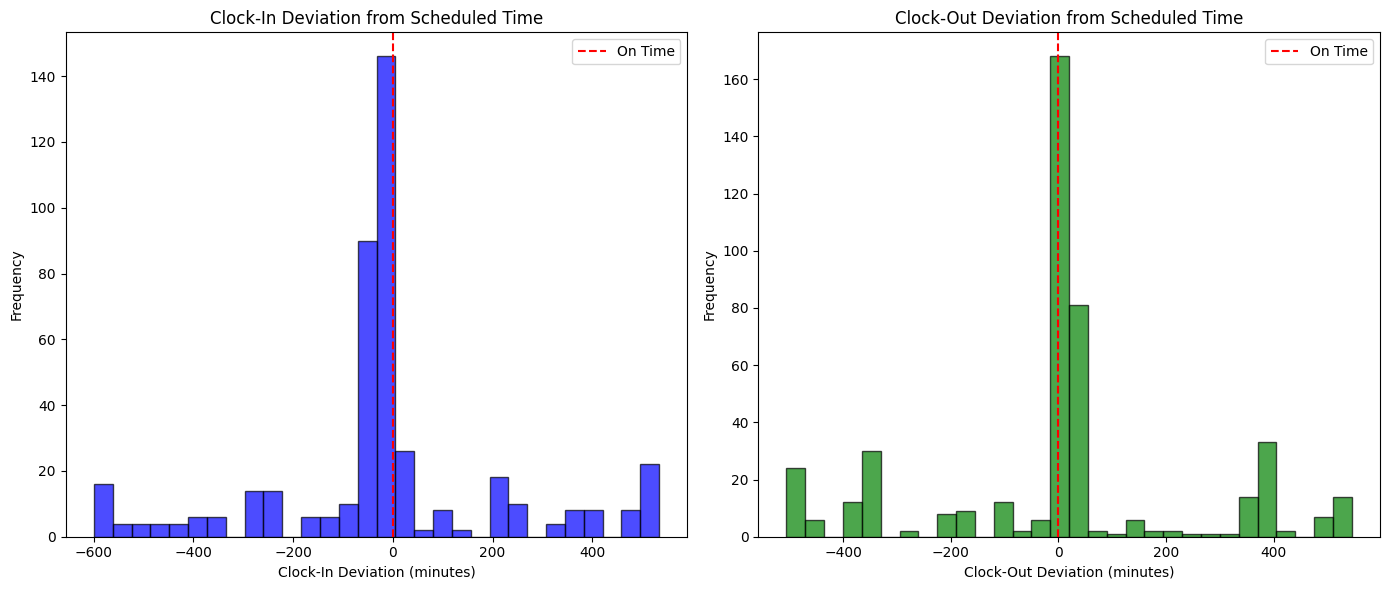

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
clock_data = pd.read_excel('/content/drive/MyDrive/Engg680_2024_Term_Project/Project Test/CLOCK IN-OUT DATA.xlsx')
schedule = pd.read_excel('/content/drive/MyDrive/Engg680_2024_Term_Project/Project Test/shift.xlsx')

# Convert times to datetime
schedule['Shift_Start'] = pd.to_datetime(schedule['Shift_Start'], format='%H:%M:%S', errors='coerce')
schedule['Shift_End'] = pd.to_datetime(schedule['Shift_End'], format='%H:%M:%S', errors='coerce')
clock_data['Clock_In_1'] = pd.to_datetime(clock_data['Clock_In_1'], format='%H:%M:%S', errors='coerce')
clock_data['Clock_Out_1'] = pd.to_datetime(clock_data['Clock_Out_1'], format='%H:%M:%S', errors='coerce')

# Merge datasets on Employee_Name and Day
merged_data = pd.merge(clock_data, schedule, how='inner', on=['Employee_Name', 'Employee_ID'])

# Calculate deviations in minutes
merged_data['Clock_In_Deviation'] = (merged_data['Clock_In_1'] - merged_data['Shift_Start']).dt.total_seconds() / 60
merged_data['Clock_Out_Deviation'] = (merged_data['Clock_Out_1'] - merged_data['Shift_End']).dt.total_seconds() / 60

# Drop rows with missing values in clock-in/out or schedule times
merged_data = merged_data.dropna(subset=['Clock_In_Deviation', 'Clock_Out_Deviation'])

# Plotting trends
plt.figure(figsize=(14, 6))

# Clock-in deviations
plt.subplot(1, 2, 1)
plt.hist(merged_data['Clock_In_Deviation'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='On Time')
plt.xlabel('Clock-In Deviation (minutes)')
plt.ylabel('Frequency')
plt.title('Clock-In Deviation from Scheduled Time')
plt.legend()

# Clock-out deviations
plt.subplot(1, 2, 2)
plt.hist(merged_data['Clock_Out_Deviation'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='On Time')
plt.xlabel('Clock-Out Deviation (minutes)')
plt.ylabel('Frequency')
plt.title('Clock-Out Deviation from Scheduled Time')
plt.legend()

plt.tight_layout()
plt.show()

# Optional: Save merged dataset to review
merged_data.to_excel('merged_output.xlsx', index=False)




In [ ]:
import cv2
import numpy as np
from PIL import Image
import os

# Path for face image database
path = 'dataset'

# Creating the face recognizer (updated to include cv2.face)
recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("Cascades/haarcascade_frontalface_default.xml");

# function to get the images and label data
def getImagesAndLabels(path):
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]
    faceSamples=[]
    ids = []
    for imagePath in imagePaths:
        PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        img_numpy = np.array(PIL_img,'uint8')
        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)
        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)
    return faceSamples,ids

print ("\n [INFO] Training faces. It will take a few seconds. Wait ...")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))

# Save the model into trainer/trainer.yml
recognizer.save('trainer/trainer.yml') # recognizer.save() worked on Mac, but not on Pi #recognizer.write

# Print the numer of faces trained and end program
print("\n [INFO] {0} faces trained. Exiting Program".format(len(np.unique(ids))))

AttributeError: module 'cv2.face' has no attribute 'LBPHFaceRecognizer_create'